# **Evolutionary Computing, lab 3 - Report**

**Authors**:
* **Kuba Czech**, 156035
* **Wojciech Nagórka**, 156045

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Description of the problem** ##

We are given a set of nodes, each defined by its x and y coordinates and an associated cost. The task is to select exactly half of the nodes (rounded up if the number is odd) and construct a Hamiltonian cycle that visits each selected node exactly once and returns to the starting node. The objective is to minimize the total sum of both the path length (computed using rounded Euclidean distances between nodes) and the costs of the selected nodes.

## **2. Pseudocode of implemented algorithms** ##

### **2.1. Data**
**Input:**
- $n$: total number of nodes  
- $nodes[i] = (x_i, y_i, cost_i)$ for $i \in [0, n-1]$: array with all nodes
- $distanceMatrix[i][j] = \text{round}\!\left(\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}\right)$: euclidean distance between i-th and j-th node

**Output:**
- $route$: list of nodes forming a closed Hamiltonian cycle  
- $totalCost = \text{distance cost} + \text{node costs}$

### **2.2. Weighted Sum 2-Regret Flexible Nearest Neighbour Heuristic**

```text
function solve(startIndex):
    route ← [startIndex]
    used[startIndex] ← true

    while size(route) < targetCount:
        bestNode, bestPos, bestScore ← -1, -1, -∞

        for each unused node j:
            deltas ← []
            for pos in 0 .. size(route):
                if pos == 0:
                    k ← route[0]
                    delta ← distance[j][k] + nodes[j].cost
                else if pos == size(route):
                    i ← route[last]
                    delta ← distance[i][j] + nodes[j].cost
                else:
                    i ← route[pos-1]
                    k ← route[pos]
                    delta ← distance[i][j] + distance[j][k] - distance[i][k] + nodes[j].cost
                deltas.add(delta)
            deltas ← sorted(deltas)
            bestΔ, secondΔ ← deltas[0], deltas[1]
            regret ← secondΔ - bestΔ
            score ← regretWeight * regret - (1 - regretWeight) * bestΔ

            if score > bestScore:
                bestScore ← score
                bestNode ← j
                bestPos ← position of bestΔ in deltas

        insert bestNode at bestPos in route
        used[bestNode] ← true

    route.add(route[0])
    return Result(route, totalCost(route))

## **3. Results of computational experiments** ##

### **3.1. Stats** ###

#### **3.1.1. Instance A** 

##### **3.1.1.1. Results**

In [47]:
stats = pd.read_csv('evaluation/TSPA_local_stats.csv')
stats

method_name      min      max       avg       sd
0  steepest_node_heuristic  69850.0  75452.0  72163.14  1385.16
1  steepest_edge_heuristic  69540.0  72546.0  70722.88   554.35
2    greedy_node_heuristic  69850.0  75452.0  72159.77  1380.06
3    greedy_edge_heuristic  69497.0  72605.0  70924.34   656.08
4     steepest_node_random  81210.0  99256.0  88726.55  3274.45
5     steepest_edge_random  71425.0  78608.0  73883.91  1260.80
6       greedy_node_random  80489.0  93612.0  86603.32  2847.36
7       greedy_edge_random  71322.0  77700.0  73986.86  1005.74

##### **3.1.1.2. Comparison with results from previous labs**

In [48]:
stats_lab1 = pd.read_csv('../lab1/evaluation/TSPA_stats.csv')
stats_lab2 = pd.read_csv('../lab2/evaluation/TSPA_stats.csv')
pd.concat([stats_lab1, stats_lab2, stats]).reset_index(drop=True)

method_name       min       max        avg        sd
0                   random_sol  244587.0  293506.0  264961.97  10112.85
1                    nn_at_end   83182.0   89433.0   85108.51   1084.77
2                  nn_flexible   71179.0   75450.0   73178.55    865.12
3                 greedy_cycle   71488.0   74410.0   72635.98    641.89
4        weighted_regret_cycle   71108.0   73395.0   72129.71    502.78
5            pure_regret_cycle  105692.0  126951.0  115579.34   3397.21
6   weighted_regret_flexibleNN   70010.0   75452.0   72401.34   1409.01
7       pure_regret_flexibleNN  106373.0  126570.0  116659.01   3254.31
8      steepest_node_heuristic   69850.0   75452.0   72163.14   1385.16
9      steepest_edge_heuristic   69540.0   72546.0   70722.88    554.35
10       greedy_node_heuristic   69850.0   75452.0   72159.77   1380.06
11       greedy_edge_heuristic   69497.0   72605.0   70924.34    656.08
12        steepest_node_random   81210.0   99256.0   88726.55   3274.45
13        steepest_edge_random   71425.0   78608.0   73883.91   1260.80
14          greedy_node_random   80489.0   93612.0   86603.32   2847.36
15          greedy_edge_random   71322.0   77700.0   73986.86   1005.74

#### **3.1.2. Instance B** 

##### **3.1.2.1. Results**

In [49]:
stats = pd.read_csv('evaluation/TSPB_local_stats.csv')
stats

method_name      min      max       avg       sd
0  steepest_node_heuristic  44507.0  54347.0  47186.60  1683.80
1  steepest_edge_heuristic  44320.0  51431.0  46347.17  1450.58
2    greedy_node_heuristic  44507.0  54035.0  47182.89  1655.20
3    greedy_edge_heuristic  44320.0  52582.0  46379.82  1533.07
4     steepest_node_random  55594.0  70220.0  63151.57  2881.23
5     steepest_edge_random  46002.0  51158.0  48523.47  1062.92
6       greedy_node_random  53992.0  69985.0  60891.65  2588.89
7       greedy_edge_random  46405.0  52029.0  48475.62  1122.24

#### **3.1.2.2. Comparison with results from previous labs**

In [50]:
stats_lab1 = pd.read_csv('../lab1/evaluation/TSPB_stats.csv')
stats_lab2 = pd.read_csv('../lab2/evaluation/TSPB_stats.csv')
pd.concat([stats_lab1, stats_lab2, stats]).reset_index(drop=True)

method_name       min       max        avg       sd
0                   random_sol  192511.0  237623.0  213299.91  8832.87
1                    nn_at_end   52319.0   59030.0   54390.43  1418.59
2                  nn_flexible   44417.0   53438.0   45870.26  1542.97
3                 greedy_cycle   49001.0   57324.0   51400.60  1450.12
4        weighted_regret_cycle   47144.0   55700.0   50897.11  1902.16
5            pure_regret_cycle   67809.0   78406.0   72740.01  1793.29
6   weighted_regret_flexibleNN   44891.0   55247.0   47653.79  1764.00
7       pure_regret_flexibleNN   67121.0   79013.0   73646.82  2268.41
8      steepest_node_heuristic   44507.0   54347.0   47186.60  1683.80
9      steepest_edge_heuristic   44320.0   51431.0   46347.17  1450.58
10       greedy_node_heuristic   44507.0   54035.0   47182.89  1655.20
11       greedy_edge_heuristic   44320.0   52582.0   46379.82  1533.07
12        steepest_node_random   55594.0   70220.0   63151.57  2881.23
13        steepest_edge_random   46002.0   51158.0   48523.47  1062.92
14          greedy_node_random   53992.0   69985.0   60891.65  2588.89
15          greedy_edge_random   46405.0   52029.0   48475.62  1122.24

### **3.2. Times** ###

#### **3.2.1. Instance A**

In [51]:
times = pd.read_csv('evaluation/TSPA_local_times.csv')
times.rename(columns={'time_ms': 'time (ms)'}, inplace=True)
times

method_name  time (ms)
0  steepest_node_heuristic        112
1  steepest_edge_heuristic        332
2    greedy_node_heuristic        187
3    greedy_edge_heuristic        564
4     steepest_node_random       6305
5     steepest_edge_random       5586
6       greedy_node_random      13583
7       greedy_edge_random      14289

#### **3.2.2. Instance B**

In [52]:
times = pd.read_csv('evaluation/TSPB_local_times.csv')
times.rename(columns={'time_ms': 'time (ms)'}, inplace=True)
times

method_name  time (ms)
0  steepest_node_heuristic        220
1  steepest_edge_heuristic        520
2    greedy_node_heuristic        330
3    greedy_edge_heuristic        717
4     steepest_node_random       6287
5     steepest_edge_random       5648
6       greedy_node_random      13755
7       greedy_edge_random      14583

### **3.3. Reporting results**

In [62]:
stats_a = pd.read_csv('evaluation/TSPA_local_stats.csv')
stats_a['Instance 1'] = stats_a['avg'] * (stats_a['max'] - stats_a['min'])
stats_a = stats_a[['method_name', 'Instance 1']]

In [63]:
stats_b = pd.read_csv('evaluation/TSPB_local_stats.csv')
stats_b['Instance 2'] = stats_b['avg'] * (stats_b['max'] - stats_b['min'])
stats_b = stats_b[['method_name', 'Instance 2']]

In [64]:
stats_all = pd.merge(stats_a, stats_b, on='method_name')
stats_all

method_name    Instance 1    Instance 2
0  steepest_node_heuristic  4.042579e+08  4.643161e+08
1  steepest_edge_heuristic  2.125930e+08  3.295747e+08
2    greedy_node_heuristic  4.042390e+08  4.495586e+08
3    greedy_edge_heuristic  2.204328e+08  3.831901e+08
4     steepest_node_random  1.601159e+09  9.236549e+08
5     steepest_edge_random  5.307081e+08  2.501870e+08
6       greedy_node_random  1.136495e+09  9.738402e+08
7       greedy_edge_random  4.718882e+08  2.726269e+08

## **4. 2D Visualization** ##

### **Reading TSP A and TSP B instances** ##

In [56]:
tsp_a = pd.read_csv('../data/TSPA.csv', sep=';', header=None)
tsp_a.columns = ['x', 'y', 'cost']

tsp_b = pd.read_csv('../data/TSPB.csv', sep=';', header=None)
tsp_b.columns = ['x', 'y', 'cost']

### **Reading files with best solutions** ##

In [57]:
instances = []

for instance, data in [("TSPA", tsp_a), ("TSPB", tsp_b)]:
    for type_of_search in ["greedy", "steepest"]:
        for type_of_move in ["edge", "node"]:
            for type_of_starting_solution in ["heuristic", "random"]:
                method_name = f"{instance}_{type_of_search}_{type_of_move}_{type_of_starting_solution}.csv"
                plot_title = f"2D Visualization of {type_of_search} type of search with {type_of_move} move and {type_of_starting_solution} starting solution for {instance} instance"
                solution = np.array(pd.read_csv(f'evaluation/results/{method_name}', sep=';', header=None).values).flatten()
                instances.append((data, solution, plot_title))

In [58]:
def plot_tsp(tsp, solution, title):
    unused_nodes = np.array(set(tsp.index).difference(solution))
    X = tsp['x'].loc[solution].values
    Y = tsp['y'].loc[solution].values
    costs = tsp['cost'].loc[solution].values

    X_unused = tsp['x'].loc[unused_nodes].values
    Y_unused = tsp['y'].loc[unused_nodes].values
    costs_unused = tsp['cost'].loc[unused_nodes].values

    plt.figure(figsize=(15, 9))
    plt.scatter(X, Y, s=costs, color='red', alpha=0.4, label='Data points')
    plt.scatter(X_unused, Y_unused, s=costs_unused, color="grey", alpha=0.4, label="Unused nodes")
    plt.scatter(X, Y, color='blue')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.plot(X, Y, color='blue', linestyle='-', linewidth=2, label='Connecting line')

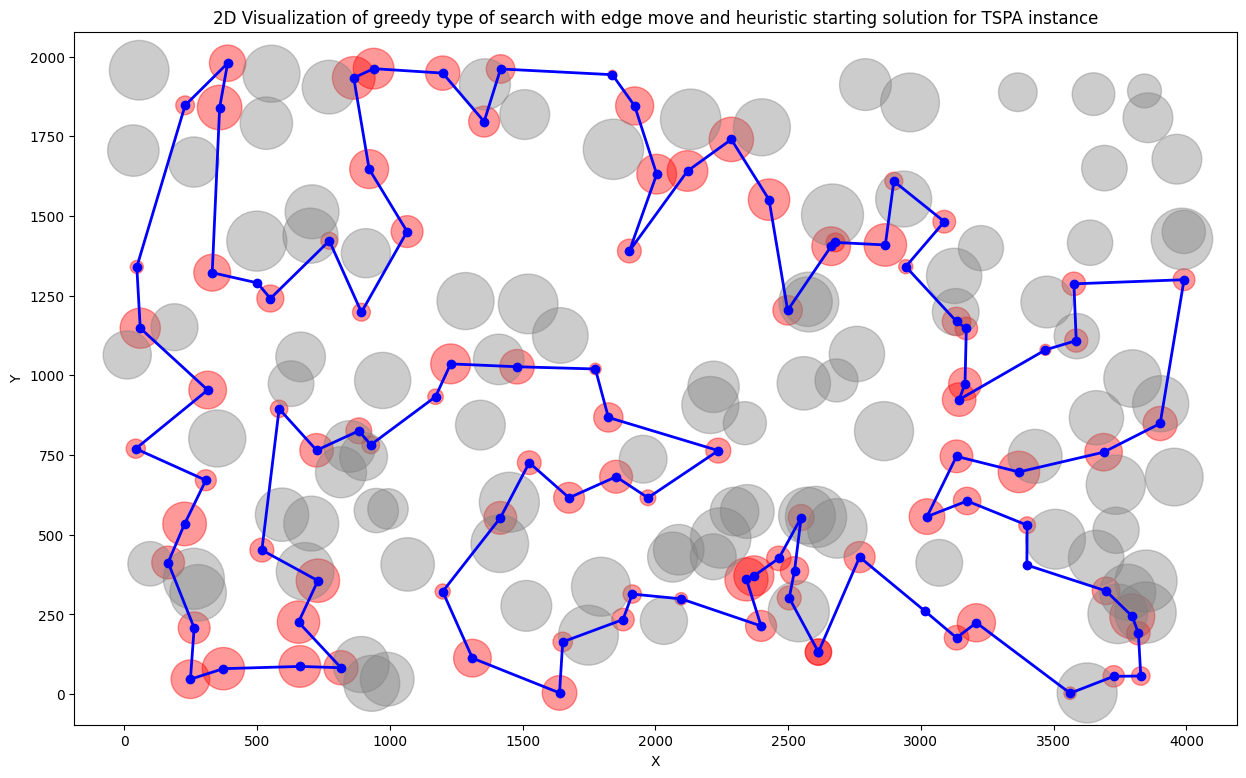

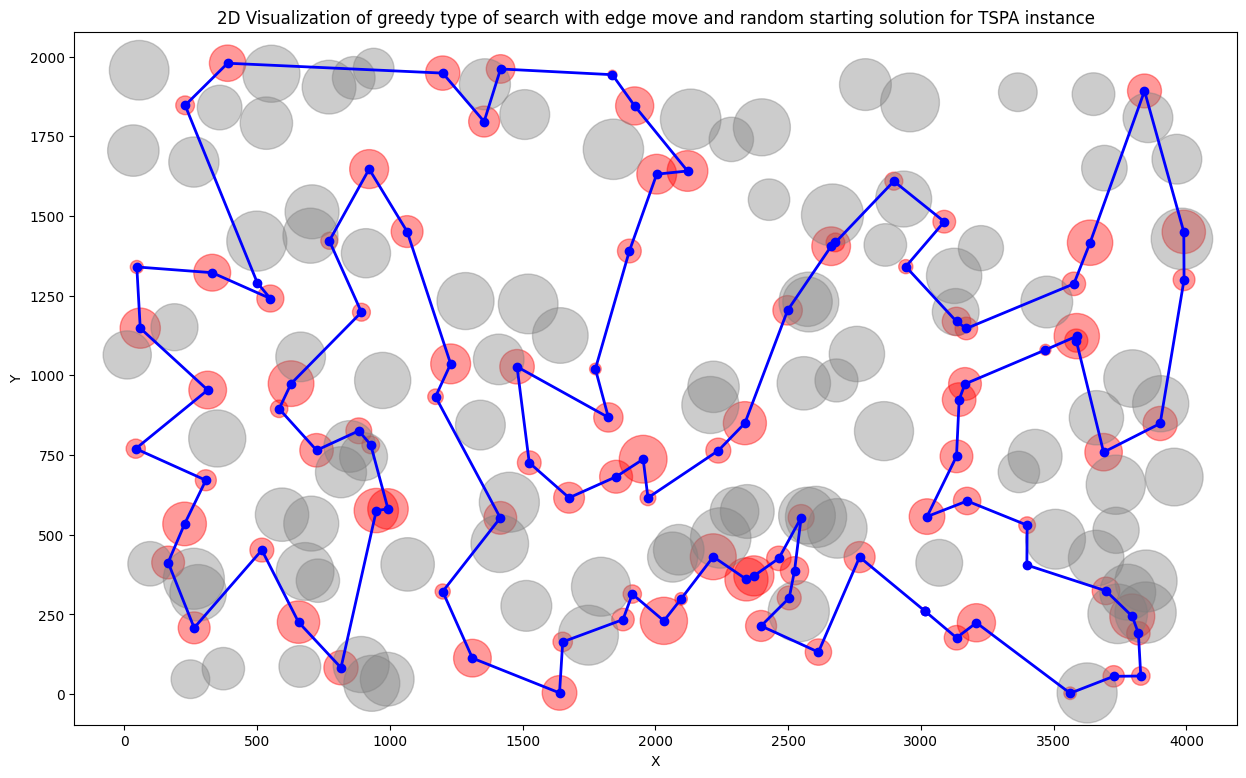

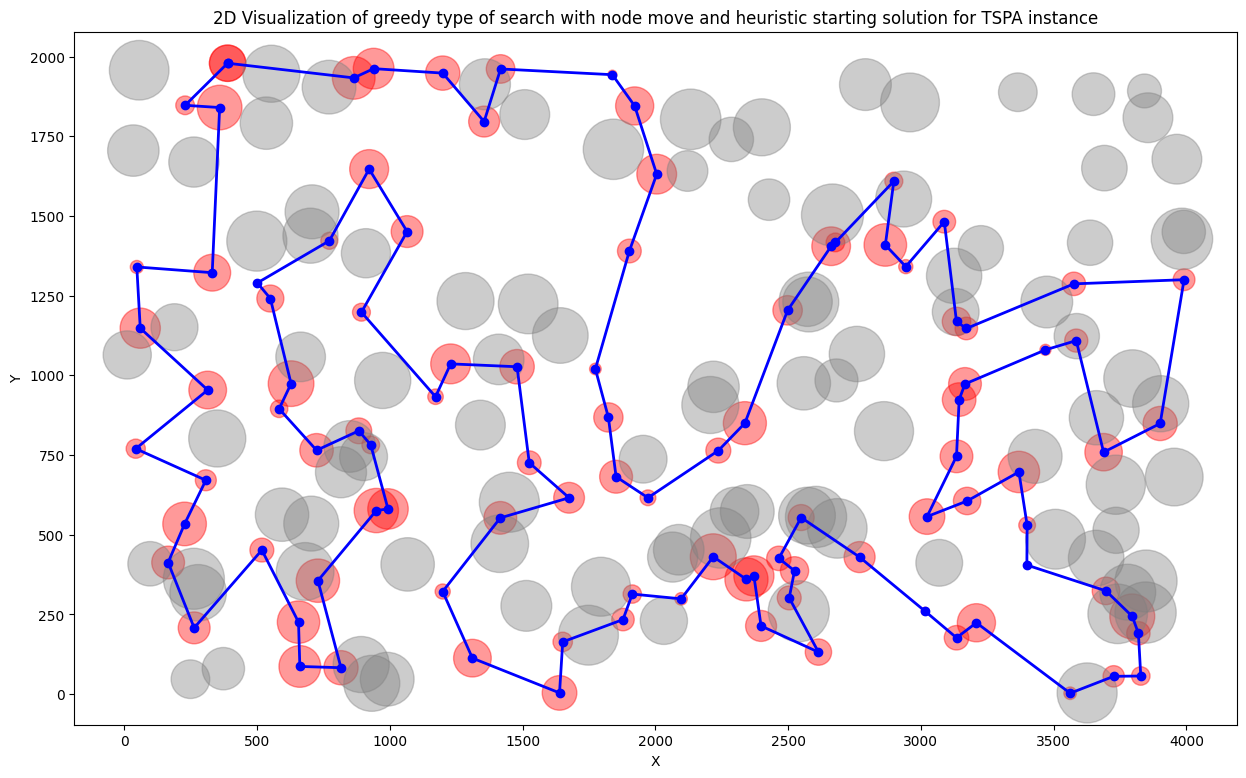

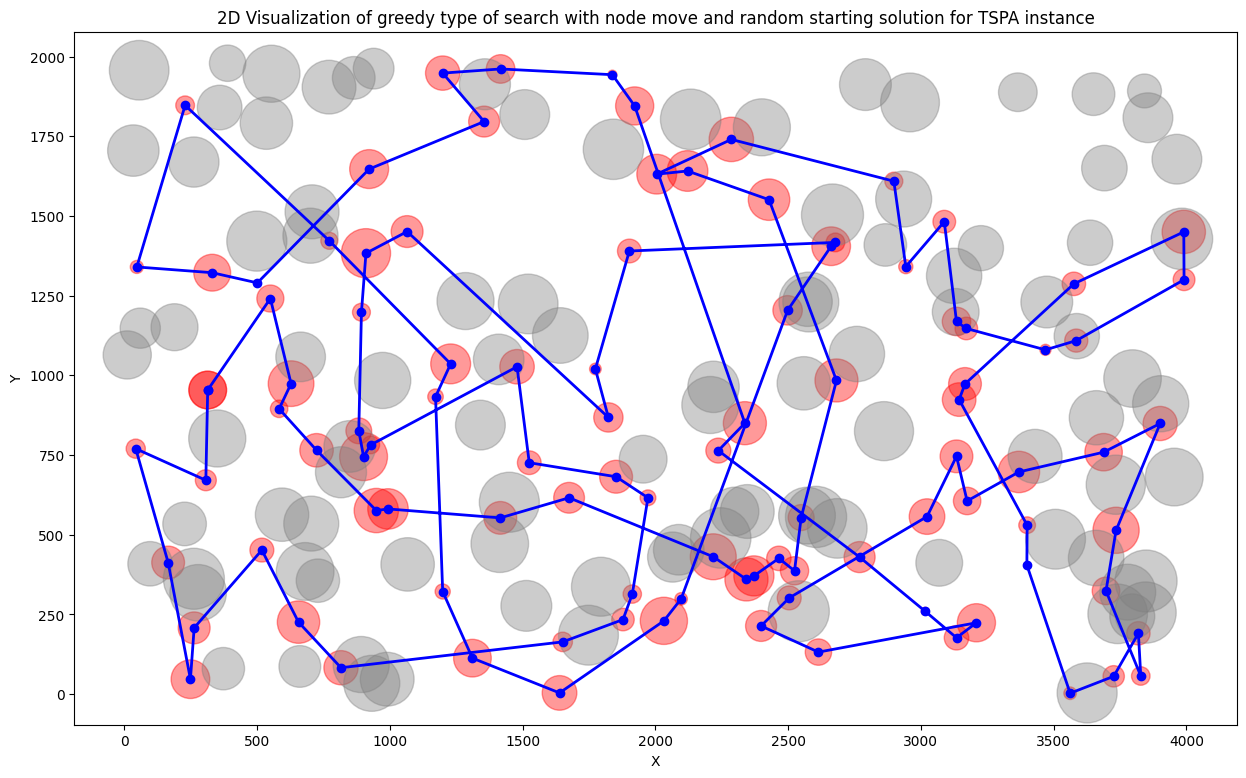

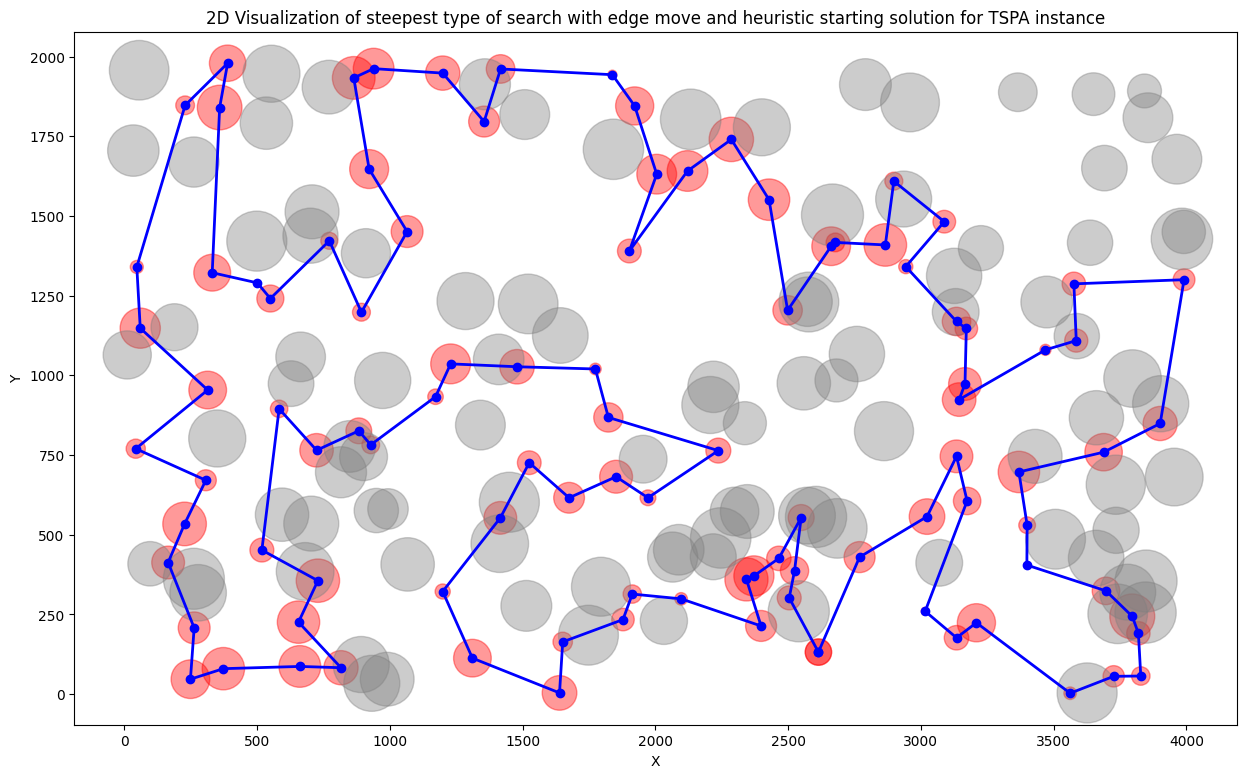

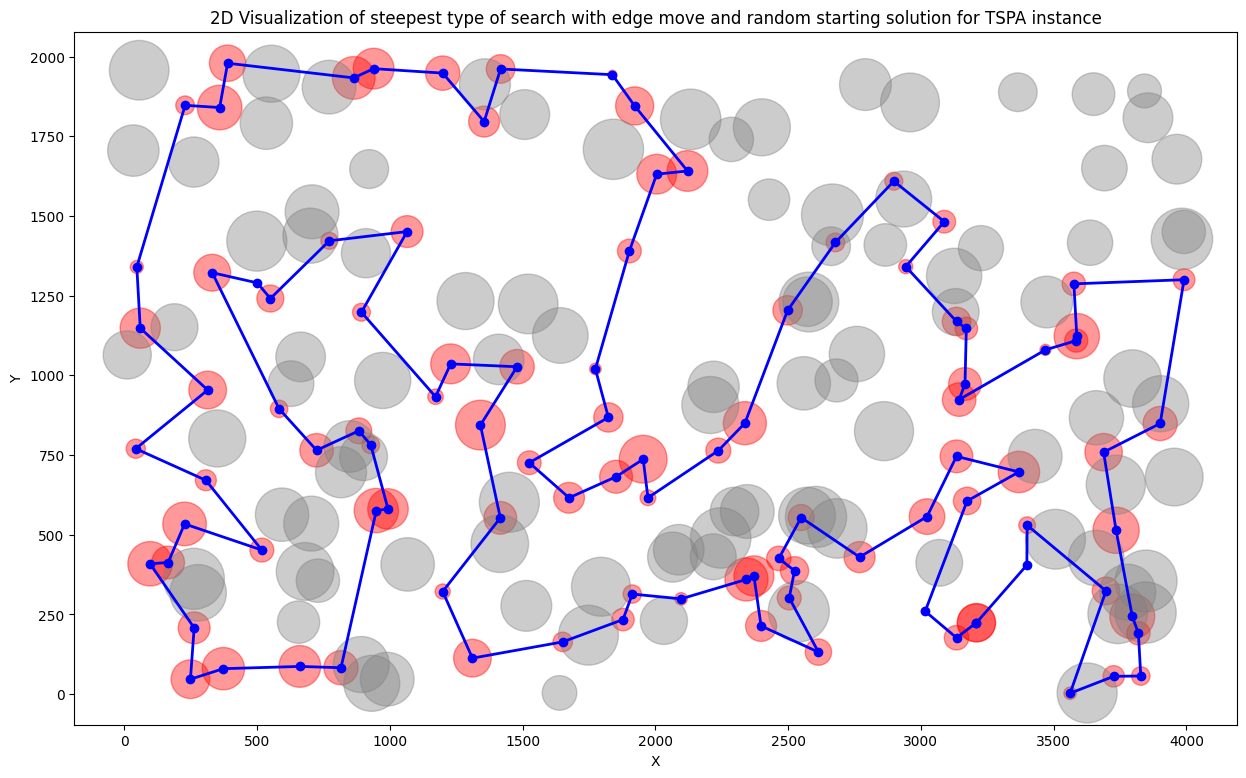

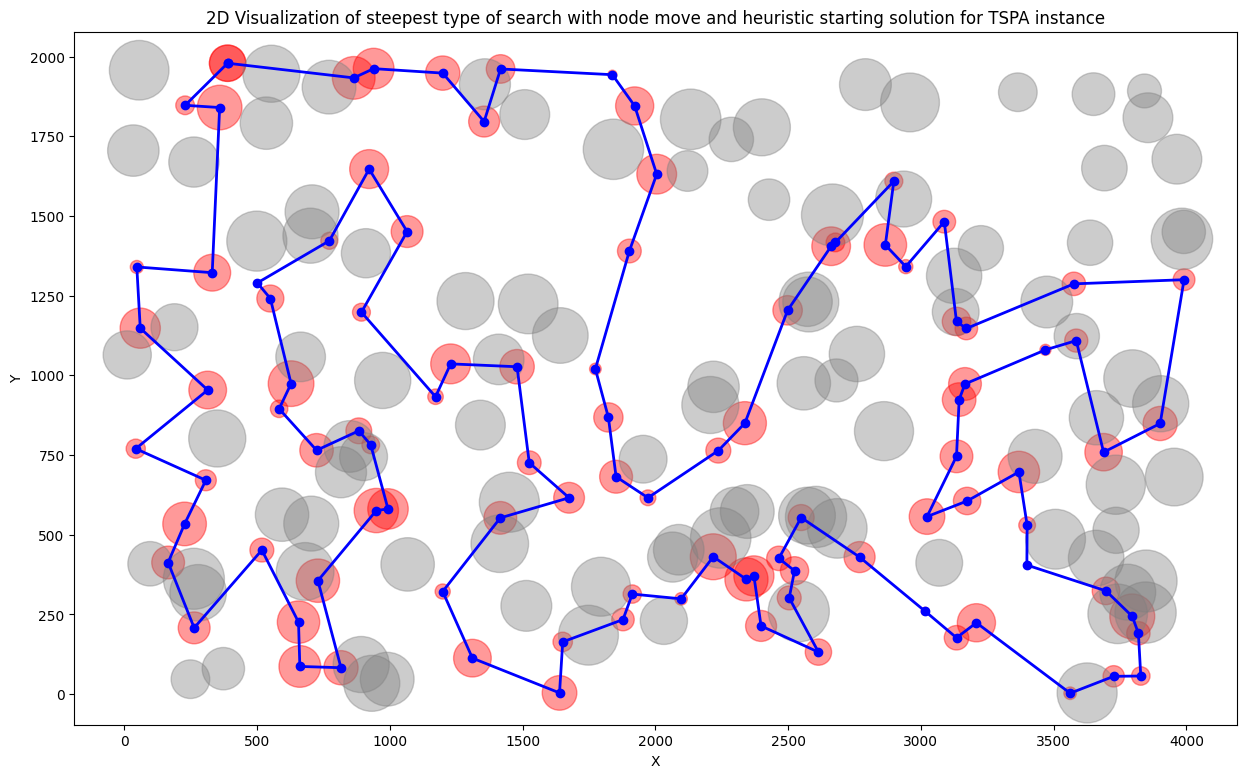

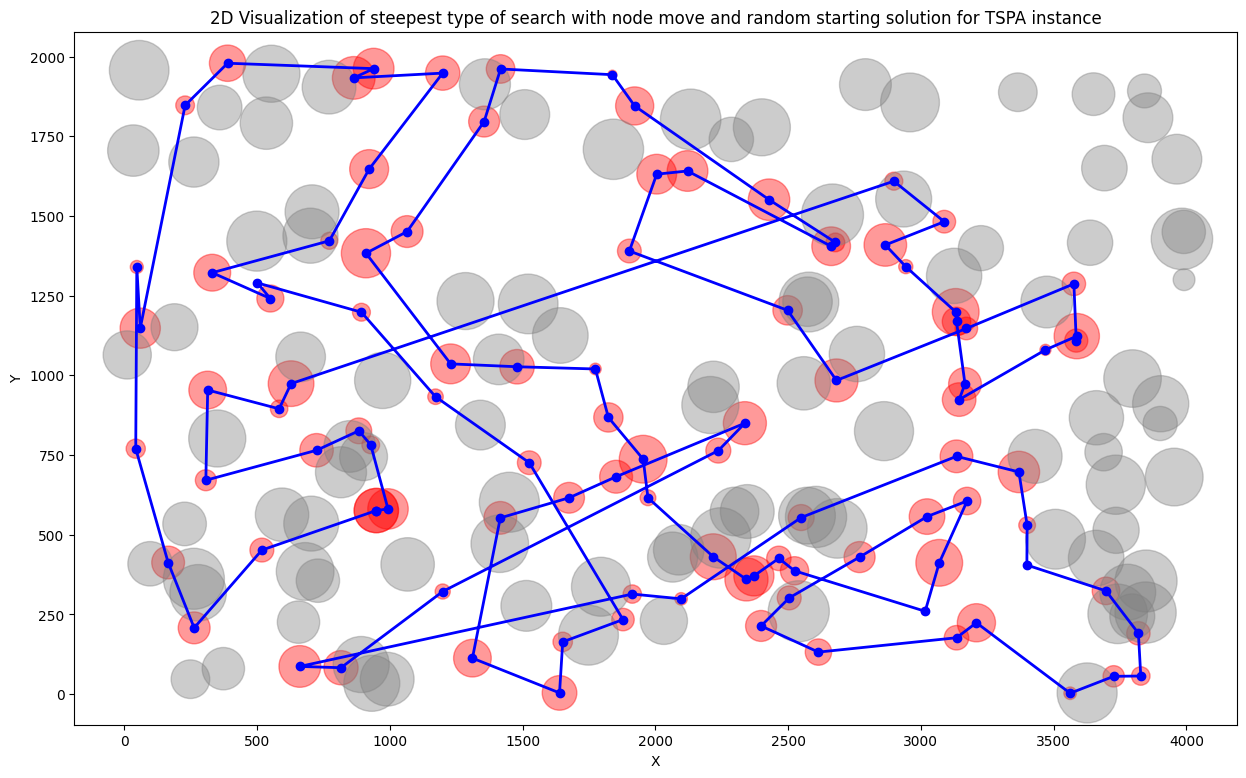

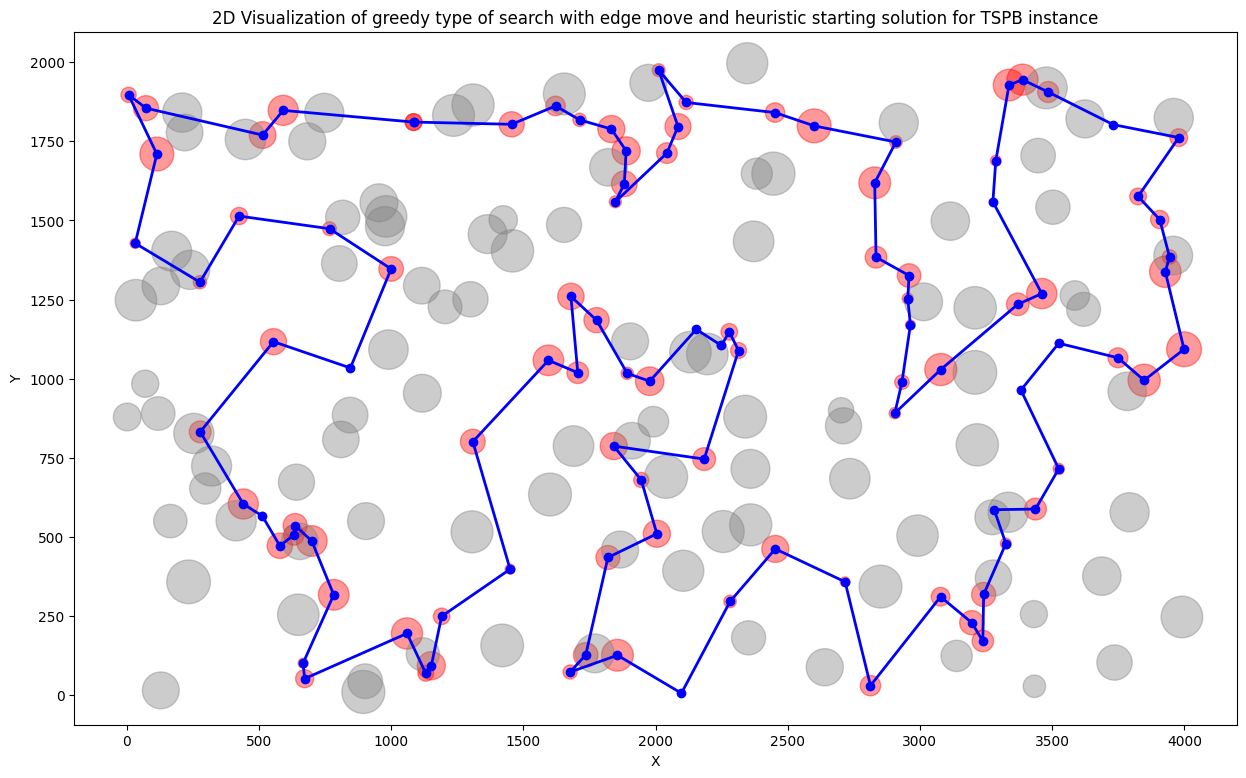

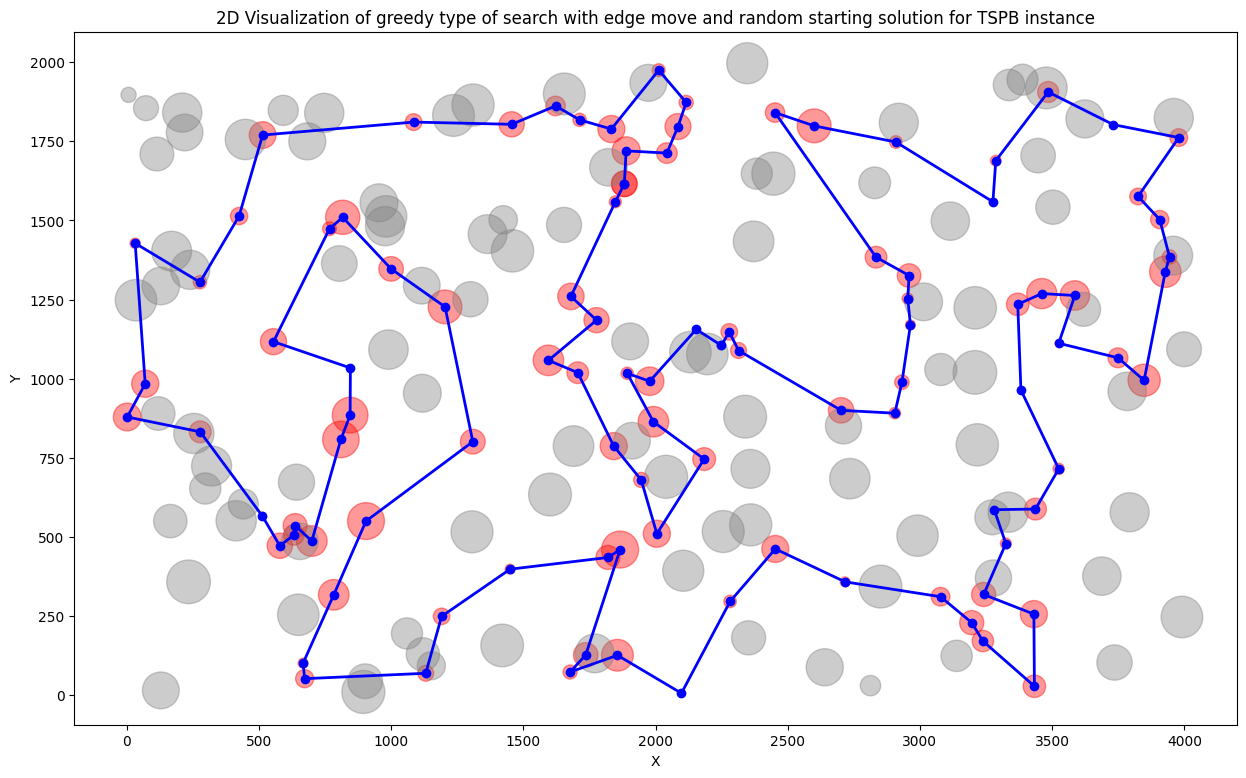

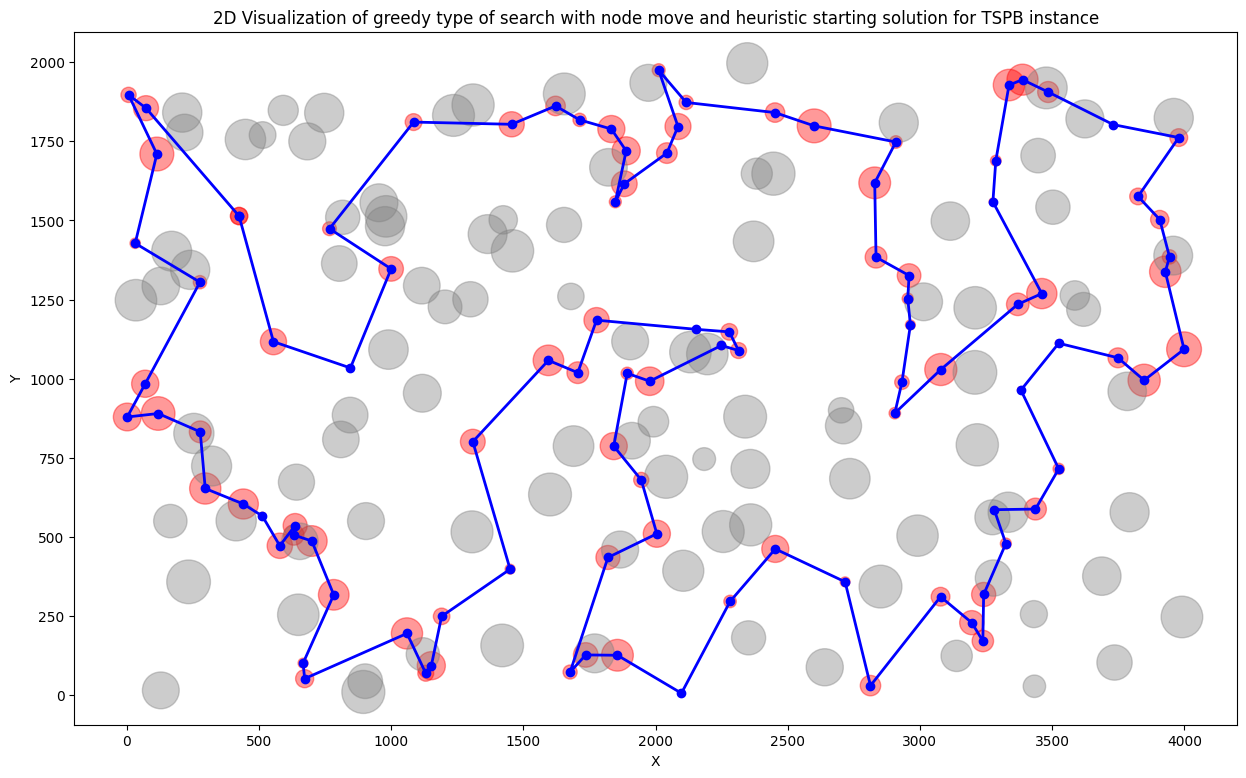

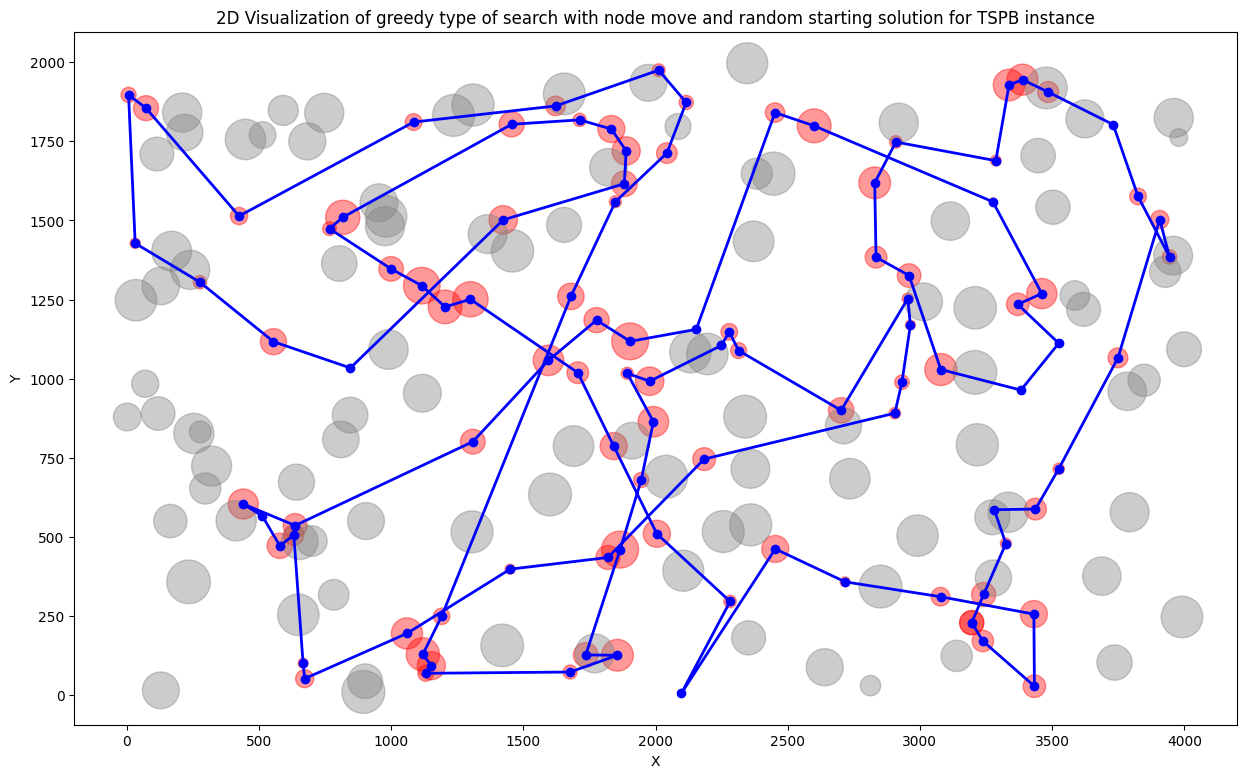

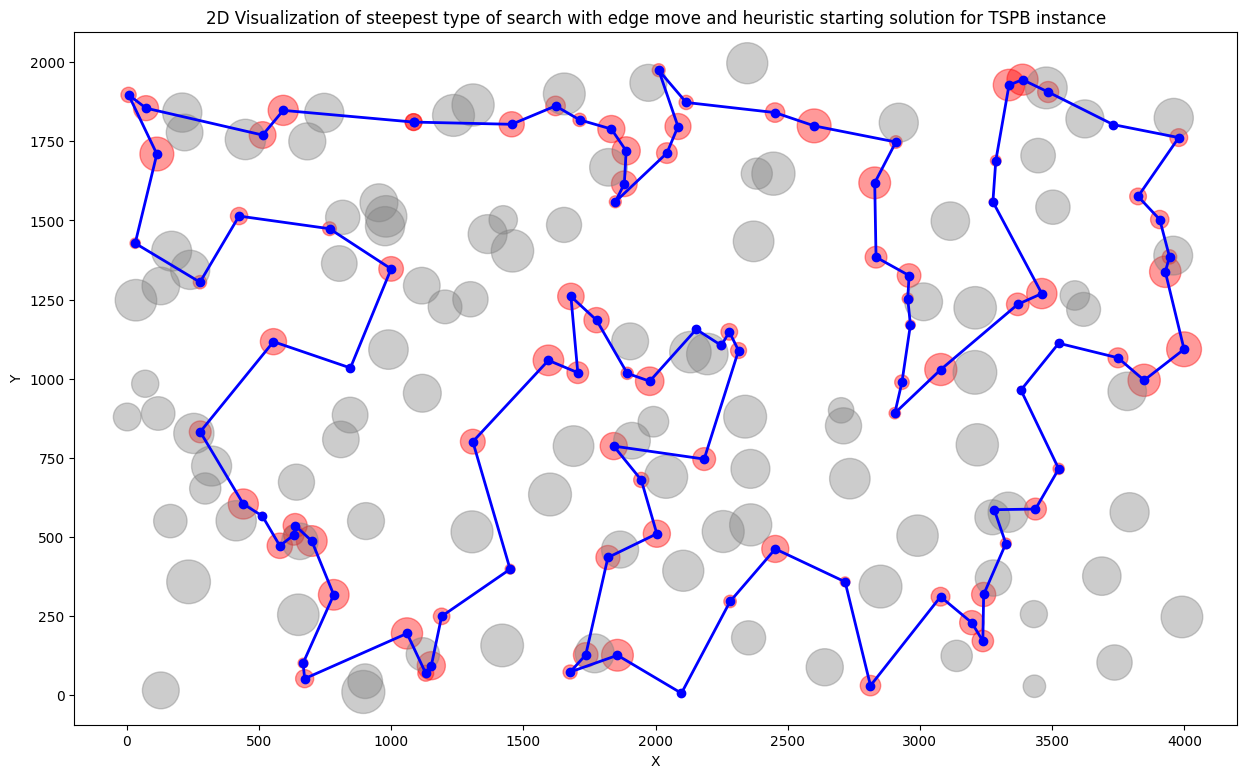

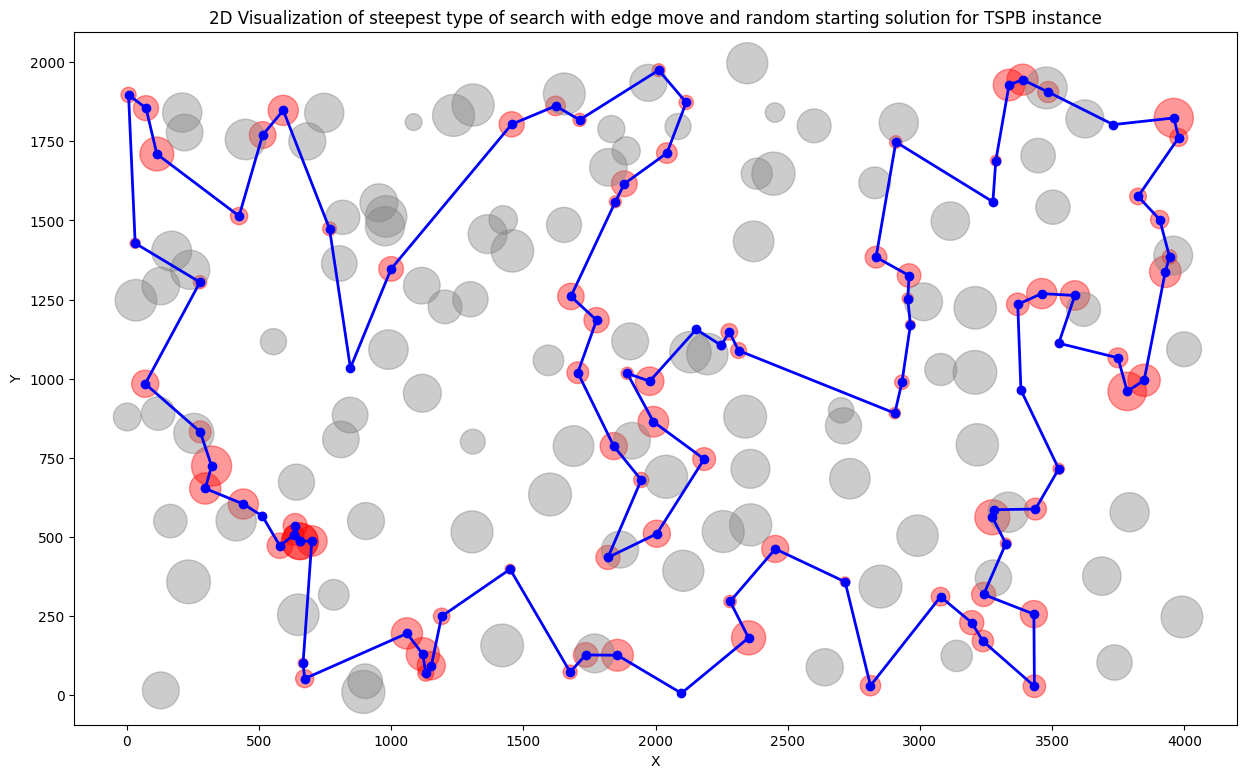

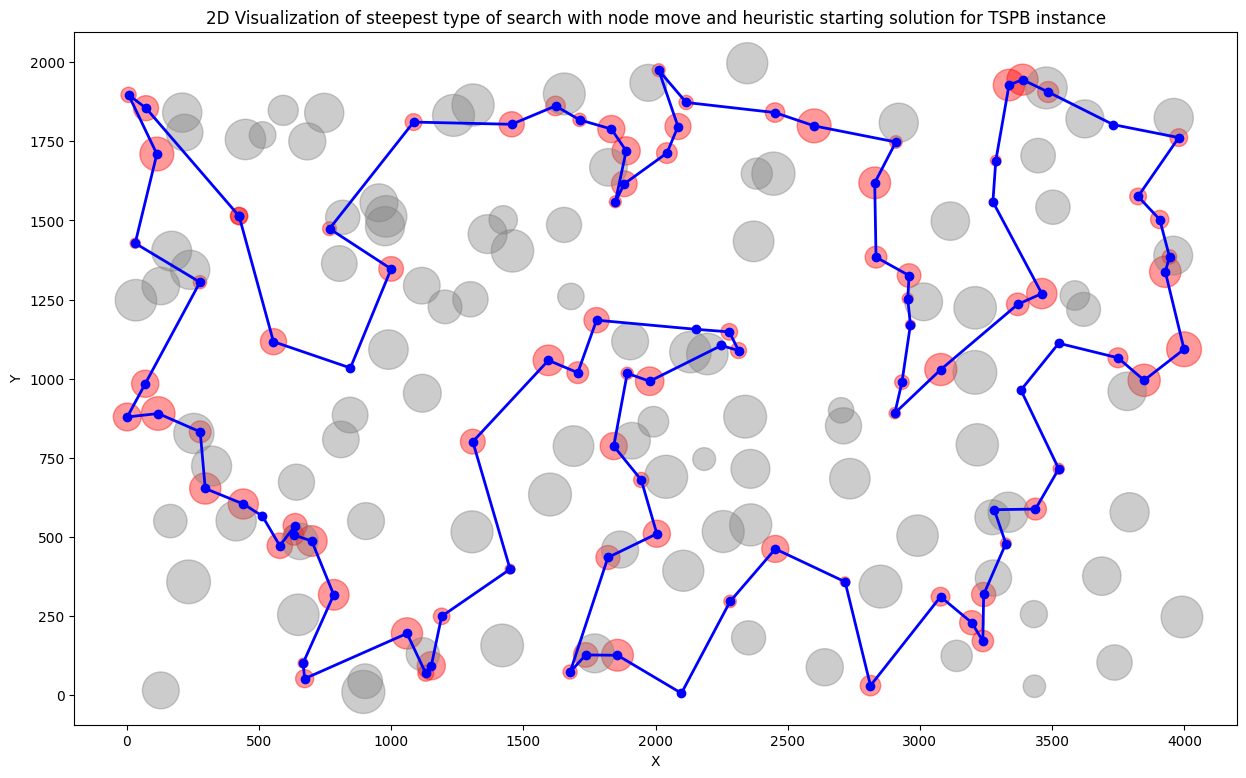

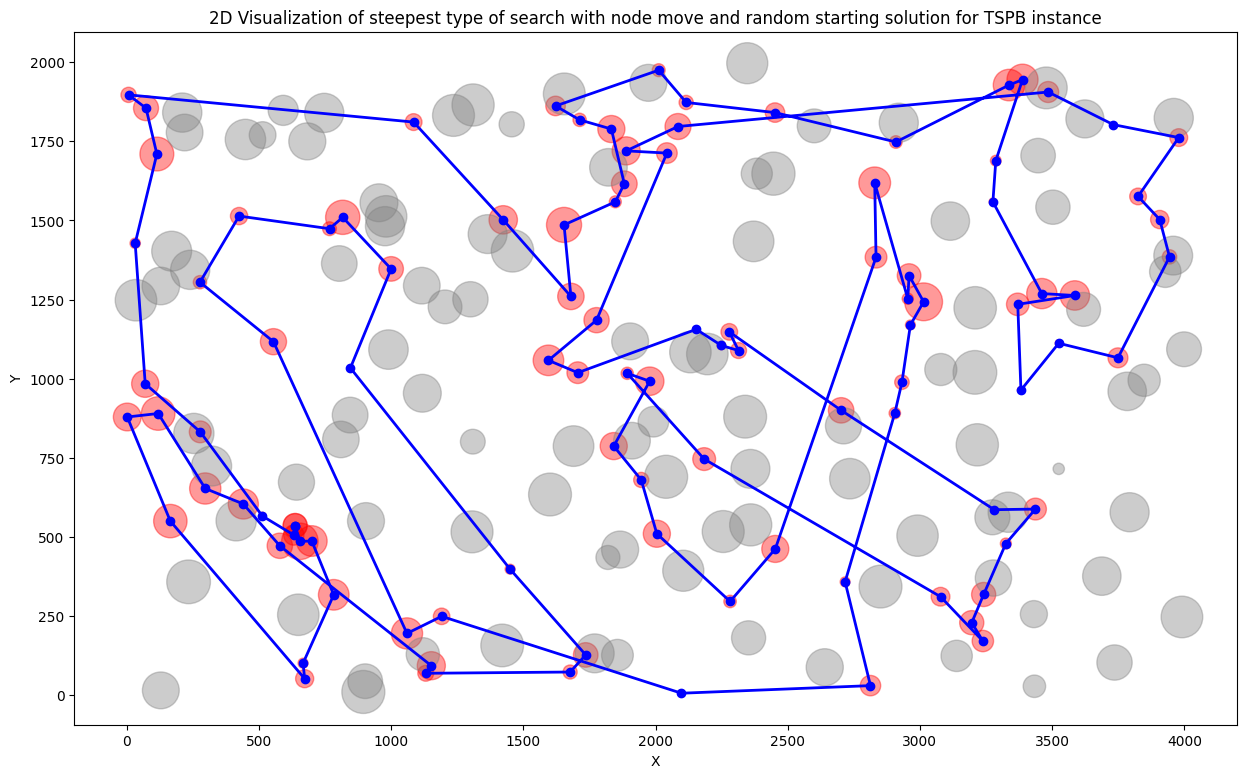

In [59]:
for i in instances:
    plot_tsp(*i)

## **5. Display of the results** ##

In [ ]:
for i in instances:
    print(f"{i[2]}:")
    print(i[1])
    print()

2D Visualization of greedy type of search with edge move and heuristic starting solution for TSPA instance:
[ 75 101   1 152  97  26 100  86  53 180 154 135  70 127 123 162 151 133
  79  63  94  80 176  51 118  59  65 116  43  42 184  35  84 112   4 190
  10 177  54  48 160  34 181 146  22  18 108  69 159 193  41 139 115  46
  68 140  93 117   0 143 183  89  23 137 186 114  15 148   9  62 102 144
  14  49 178 106  52  55 185  40 165  90  81 196 179  57 129  92 145  78
  31  56 113 175 171  16  25  44 120   2  75]
101

2D Visualization of greedy type of search with edge move and random starting solution for TSPA instance:
[120  44  25  16 171 175 113  56  31  78 145  92 129  57  55  52 185 119
  40 196  81  90  27 164  39 165 106 178  49  14 144  62   9 148 124  94
  63 122  79 133 151  51  80 176 137  23 186  89 183 143   0 117 108  18
 193  41 159  22 146 181  34 160  48  54 177 184  84 112 131 149  65 116
  43  42   5 115 139  68  46 118  59 162 123 127  70 135 154 180 158  53
 121 1

## **6. Usage of solution checker**

Solution checker was used for all computed above solutions and value of objective functions are correct.

## **7. Link to the source code** ##

https://github.com/WojtekNagorka/Evolutionary-computation/tree/main/lab3

## **8. Conclusions**

**TODO**